In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.metrics import mean_squared_error

In [25]:
df = pd.read_csv('/content/Sales_Data.csv')

In [26]:
df.isnull().sum()

Month    0
Qty      2
dtype: int64

In [27]:
df['Qty'] = df['Qty'].fillna(df['Qty'].median())

In [28]:
df.head(3)

,Month,Qty
0,Jan-21,25.0
1,Feb-21,25.0
2,Mar-21,33.0


Exponential Smoothening (Weighted Moving Averages)

In [29]:
df['ewm0.2'] = np.round(df.Qty.ewm(alpha = 0.2).mean(),0)

In [30]:
df

,Month,Qty,ewm0.2
0,Jan-21,25.0,25.0
1,Feb-21,25.0,25.0
2,Mar-21,33.0,28.0
3,Apr-21,25.0,27.0
4,May-21,20.0,25.0
5,Jun-21,30.0,26.0
6,Jul-21,53.0,33.0
7,Aug-21,40.0,35.0
8,Sep-21,30.0,34.0
9,Oct-21,53.0,38.0


In [31]:
# defining a function get_mape to calculate MAPE (Mean Absolute Percentage Error)

def get_mape(actual, pred):
  return np.round(np.mean(np.abs(100*(actual-pred)/actual)),2)

In [24]:
mape = get_mape(df.Qty, df.ewm0.2)
mape

17.03

In [20]:
rmse = np.round(np.sqrt(mean_squared_error(df.Qty, df.ewm0.2)),2)
rmse

8.46

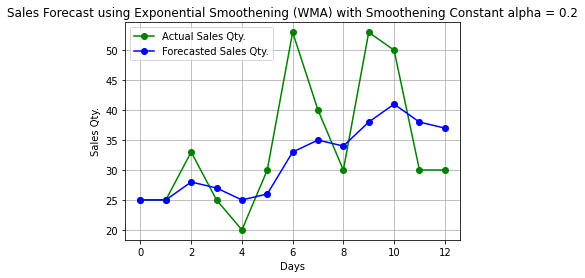

<Figure size 1080x720 with 0 Axes>

In [33]:
plt.plot(df['Qty'], label = 'Actual Sales Qty.', marker = 'o', color = 'green')
plt.plot(df['ewm0.2'], label = 'Forecasted Sales Qty.', marker = 'o', color = 'blue')
plt.title('Sales Forecast using Exponential Smoothening (WMA) with Smoothening Constant alpha = 0.2')
plt.xlabel('Days')
plt.ylabel('Sales Qty.')
plt.legend()
plt.grid(True)
plt.figure(figsize=(15,10))
plt.show()